# Car Evaluation Data Set

### Feature names:

- Buying: v-high, high, med, low
- Maintance cost: v-high, high, med, low
- Doors: 2, 3, 4, 5-more
- Seats: 2, 4, more
- Luggage_size: small, med, big
- Safety: low, med, high
- Decision: acceptable or unacceptable


https://archive.ics.uci.edu/ml/datasets/car+evaluation

## Tasks:

- EDA

- kNN

- Decision Tree

- Random Forest Classifier

In [1]:
# Ignore warning
import warnings
warnings.filterwarnings("ignore")

# Import main libraries
import pandas as pd
import numpy as np

# Encode categorial features
import category_encoders as ce

# Visualisation
import matplotlib.pyplot as plt

# Interactive visualisation
import plotly.offline as py 
py.init_notebook_mode(connected=True)                  
import plotly.graph_objs as go                         
import plotly.tools as tls  
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

# Preprocessing libraries
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
from sklearn import tree
from sklearn.metrics import confusion_matrix







In [2]:
# Read of the data
df = pd.read_csv("car_evaluation.csv")

# Display top 5 observations of the dataframe
df.head(5)

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


Pandas is treating its first row as heading.

In [3]:
# reloading datasetbby ignoring the headings
df=pd.read_csv("car_evaluation.csv",header=None)
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Based on the information provided on the UCI's website the features name need to be renamed.



In [4]:
# Variable to store a list containing the feature names
feature_names =['Buying','Maint_cost','Doors','Seats','Luggage_size','Safety','Decision']

# Defining the columns of the df equals to the variable created above
df.columns=feature_names

# Display first 5 observations of the df
df.head()

,Buying,Maint_cost,Doors,Seats,Luggage_size,Safety,Decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# EDA

In [5]:
# Info of the data types and count of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Buying        1728 non-null   object
 1   Maint_cost    1728 non-null   object
 2   Doors         1728 non-null   object
 3   Seats         1728 non-null   object
 4   Luggage_size  1728 non-null   object
 5   Safety        1728 non-null   object
 6   Decision      1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


- No missing values

- Doors and Seats new to be converto into integer type

In [6]:
# Convert categorical to integer data type
df['Doors'] = pd.to_numeric(df['Doors']) 
df['Seats'] = pd.to_numeric(df['Seats']) 

# Show info
df.info()

ValueError: Unable to parse string "5more" at position 81

It seems that numbers and text are mixd together!

In [7]:
# Print unique classes for Doors and Seats variables
print("Doors unique classes:",df['Doors'].unique())
print("Seats unique classes:",df['Seats'].unique())

Doors unique classes: ['2' '3' '4' '5more']
Seats unique classes: ['2' '4' 'more']


After investiganting the error, I will keep both features as object because I would not be able to indentify the exactly number when it is 5more or more. 

In [8]:
# Show stats metrics for the categorical variables
df.describe()

,Buying,Maint_cost,Doors,Seats,Luggage_size,Safety,Decision
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,3,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [9]:
# Loop to display the count for each classes within the features
for col in feature_names:
    
    print(df[col].value_counts())   

vhigh    432
low      432
high     432
med      432
Name: Buying, dtype: int64
vhigh    432
low      432
high     432
med      432
Name: Maint_cost, dtype: int64
3        432
2        432
5more    432
4        432
Name: Doors, dtype: int64
2       576
more    576
4       576
Name: Seats, dtype: int64
small    576
big      576
med      576
Name: Luggage_size, dtype: int64
low     576
high    576
med     576
Name: Safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: Decision, dtype: int64


### Summary:

- There are 7 variables and all of them are categorical variable.

- **Class** is the target variable and there are 4 classe within that variable: unacc, acc, good, vgood


In [10]:
# Sum of the missing values by feature
df.isnull().sum()

Buying          0
Maint_cost      0
Doors           0
Seats           0
Luggage_size    0
Safety          0
Decision        0
dtype: int64

In [11]:
# Create a variable to store the Bar plot
data = [
    go.Bar(
        x=df['Decision'].value_counts().keys(), # x-axis -> Count labels
        y=df['Decision'].value_counts() # y-axis -> Count the classes
    )]

# Create another variable to store all the settings of the Bar plot such as figure size, title, hovermode..
layout = go.Layout(
    height=500,
    title={'text': "Count of Decision feature classes", # Subplot main title
           'y':0.95, # Set main title y-axis position
           'x':0.5, # Set main title x-axis position
           'xanchor': 'center', # xachor position
           'yanchor': 'top'}, # yachpr 
hovermode='closest',
xaxis=dict(title='Count', ticklen=5, zeroline=False, gridwidth=2, domain=[0.1, 1]), # x-axis settings
yaxis=dict(title='Classes', ticklen=5, gridwidth=2), # y-axis settings
showlegend=False # No legend
)

# Create another variable to generate the plot. This variable is composed by the other two variables created earlier
fig = go.Figure(data=data, layout=layout)

# Display the plot
py.iplot(fig, filename="Count of Decision feature classes")

Clearly the target variable is unbalanced. It brings bias to the modelling part. 

Also, the dataframe need to be encoded as all the features are categorical variables.

All features they are ordinal in nature because they express a level of quality(unacc, acc, good, vgood) or quantity (number of seats or doors). So, the categories have an inherent order.







# Feature Engineering



### Label Encoding or Ordinal Encoding

"We use this categorical data encoding technique when the categorical feature is ordinal. In this case, retaining the order is important. Hence encoding should reflect the sequence.

In Label encoding, each label is converted into an integer value. We will create a variable that contains the categories representing the education qualification of a person."

Based on https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/

In [12]:
# Define X and y
X = df.drop(['Decision'], axis=1)
y = df['Decision']

In [13]:
# Shows feature names for the X variable. 
X.columns

Index(['Buying', 'Maint_cost', 'Doors', 'Seats', 'Luggage_size', 'Safety'], dtype='object')

In [14]:
# Create a list to store the variable names of the X 
features = ['Buying', 'Maint_cost', 'Doors', 'Seats', 'Luggage_size', 'Safety']

# Create the object encoder 
encoder = ce.OrdinalEncoder(cols=features)

# Create a variable to store the new dataframe 
X_encoder = encoder.fit_transform(X) # Apply the fit_transform method

In [15]:
# Check the changes
X_encoder

,Buying,Maint_cost,Doors,Seats,Luggage_size,Safety
0,1,1,1,1,1,1
1,1,1,1,1,1,2
2,1,1,1,1,1,3
3,1,1,1,1,2,1
4,1,1,1,1,2,2
...,...,...,...,...,...,...
1723,4,4,4,3,2,2
1724,4,4,4,3,2,3
1725,4,4,4,3,3,1
1726,4,4,4,3,3,2


# Train and test split

In [16]:
# Train and test split: 0.3 test and 0.7 training
X_train, X_test, y_train, y_test = train_test_split(X_encoder, y, test_size = 0.30, random_state = 42)

In [17]:
# Check the shape of X_train, y_train, X_test, y_test
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1209, 6), (1209,), (519, 6), (519,))

# Models

## kNN Classifier

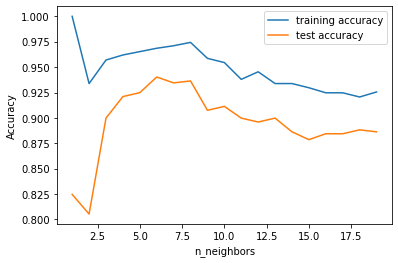

In [18]:

# Create two lists in order to store training and testing accuracy
training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 20
neighbors_settings = range(1, 20)

# Use a loop in order to go through each number from 1 to 20
for n_neighbors in neighbors_settings:

# Build the model based on the numbers of the range 
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    
# Train the model on the given k
    clf.fit(X_train, y_train)

# Record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))

# Record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
# Plot the line for the training accuracy in order to identify the optimal k
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")

# Plot the line for the testing accuracy in order to identify the optimal k
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")

# Set ylabel as Accuracy
plt.ylabel("Accuracy")

# Set xlabel as the number of neighbors
plt.xlabel("n_neighbors")

# Set the legend
plt.legend()

# Store the results into a dictionary
res_dfTrain = {}
res_dfTest = {}

              precision    recall  f1-score   support

         acc       0.86      0.86      0.86       118
        good       0.55      0.58      0.56        19
       unacc       0.97      0.99      0.98       358
       vgood       0.87      0.54      0.67        24

    accuracy                           0.92       519
   macro avg       0.81      0.74      0.77       519
weighted avg       0.92      0.92      0.92       519



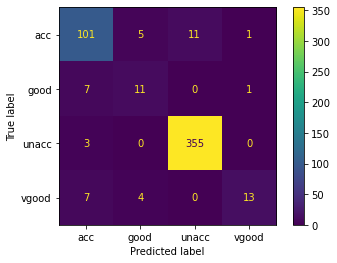

In [19]:
# Based on the plot above the optimal number for k is 5. 
model = KNeighborsClassifier(n_neighbors = 5)

# Train the model
model.fit(X_train, y_train)

# Make predictions using the test data
y_pred = model.predict(X_test)

# Display the classification report
print(classification_report(y_test,y_pred))

# Display the confusion matrix 
plot_confusion_matrix(model,X_test,y_test);

In [20]:
# Predict the results
y_pred = model.predict(X_test)

# Display the confusion matrix
confusion_matrix(y_test,y_pred)

array([[101,   5,  11,   1],
       [  7,  11,   0,   1],
       [  3,   0, 355,   0],
       [  7,   4,   0,  13]])

In [21]:
# Print train set accuracy
print("Train set accuracy: {:.2f}".format(model.score(X_train, y_train)))

# Print test set accuracy
print("Test set accuracy: {:.2f}".format(model.score(X_test, y_test)))

Train set accuracy: 0.97
Test set accuracy: 0.92


## Decision Tree Classifier

In [22]:
# Create and initialise a DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 7, random_state = 0)

# Train the classifier by calling a method 'fit()'
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=0)

In [23]:
# Calculate the predicted vlaue by calling a method predict()
y_pred = dt.predict(X_test)

In [24]:
# Print train set accuracy
print("Train set accuracy: {:.2f}".format(dt.score(X_train, y_train)))

# Print test set accuracy
print("Test set accuracy: {:.2f}".format(dt.score(X_test, y_test)))

Train set accuracy: 0.95
Test set accuracy: 0.92


              precision    recall  f1-score   support

         acc       0.85      0.81      0.83       118
        good       0.52      0.58      0.55        19
       unacc       0.97      0.97      0.97       358
       vgood       0.77      0.83      0.80        24

    accuracy                           0.92       519
   macro avg       0.78      0.80      0.79       519
weighted avg       0.92      0.92      0.92       519



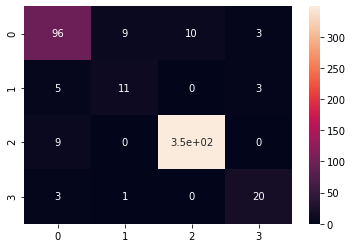

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

# print the classification_report based on y_test and y_predict
print(classification_report(y_test, y_pred))

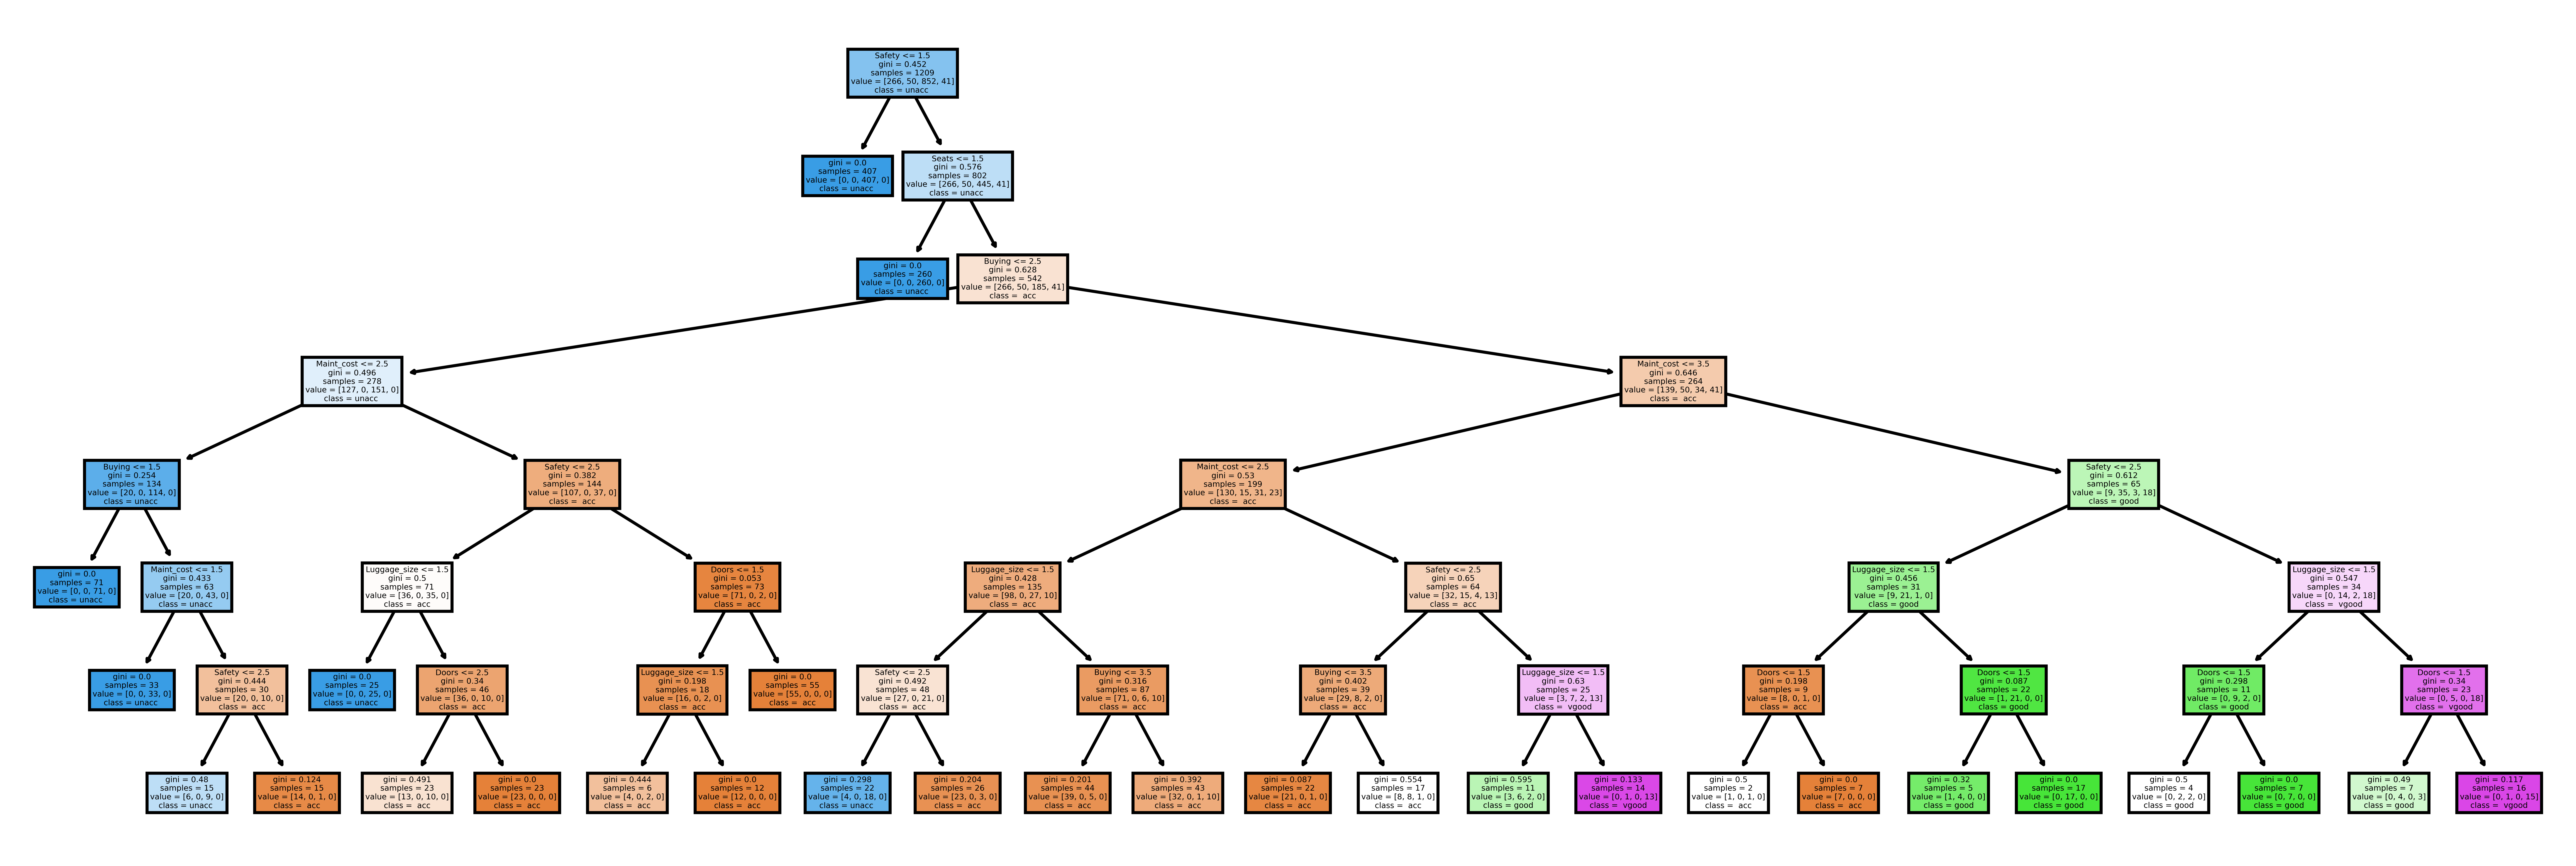

In [26]:
# Column names for dataset
fn = features

# Classes of the Output variable
cn= [' acc','good','unacc ',' vgood']

# Setting dpi = 600 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,5), dpi=1000)

# Plot tree using tree library
tree.plot_tree(dt, # Decision Tree model
           feature_names = fn, # Feature names define above
           class_names=cn, # Classes defined above
           filled = True); 

## Decision Tree Classifier using GridSearchCV

In [27]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }

tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, n_jobs = -1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [28]:
final_model = grid_search.best_estimator_
final_model

DecisionTreeClassifier(max_depth=8, max_features='auto', random_state=1024)

In [29]:
# Create and initialise a DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=8, max_features='auto', random_state=1234545)

# Train the classifier by calling a method 'fit()'
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, max_features='auto', random_state=1234545)

In [30]:
# Calculate the predicted vlaue by calling a method predict()
y_pred = dt.predict(X_test)

In [31]:
# Print train set accuracy
print("Train set accuracy: {:.2f}".format(dt.score(X_train, y_train)))

# Print test set accuracy
print("Test set accuracy: {:.2f}".format(dt.score(X_test, y_test)))

Train set accuracy: 0.92
Test set accuracy: 0.89


              precision    recall  f1-score   support

         acc       0.76      0.85      0.80       118
        good       0.61      0.58      0.59        19
       unacc       0.97      0.94      0.96       358
       vgood       0.61      0.58      0.60        24

    accuracy                           0.89       519
   macro avg       0.74      0.74      0.74       519
weighted avg       0.89      0.89      0.89       519



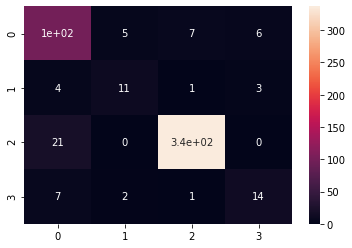

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

# print the classification_report based on y_test and y_predict
print(classification_report(y_test, y_pred))

The first version of the model using max_depth 7 performed better than the version using GridSearchCV!

## Random Forest Classifier

In [33]:
#Create a Random Forest Classifier 
rf = RandomForestClassifier(n_estimators = 100)

# Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_train,y_train)

# Make predicitons on the test data
y_pred = rf.predict(X_test)

In [34]:
# Print train set accuracy
print("Train set accuracy: {:.2f}".format(rf.score(X_train, y_train)))

# Print test set accuracy
print("Test set accuracy: {:.2f}".format(rf.score(X_test, y_test)))

Train set accuracy: 1.00
Test set accuracy: 0.97


## Random Forest Classifier using GridSearchCV

In [35]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [36]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Display the best parameters searched
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [43]:
#Create a Random Forest Classifier 
rf = RandomForestClassifier(n_estimators = 110,
                            max_depth = 90,
                            min_samples_leaf=3,
                            min_samples_split=8,
                            max_features= 3)
                            
                         

# Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_train,y_train)

# Make predicitons on the test data
y_pred = rf.predict(X_test)

# Print train set accuracy
print("Train set accuracy: {:.2f}".format(rf.score(X_train, y_train)))

# Print test set accuracy
print("Test set accuracy: {:.2f}".format(rf.score(X_test, y_test)))

Train set accuracy: 0.99
Test set accuracy: 0.95


Model hypertunned managed to narrow the gap to original model.

# Feature Importance

In [44]:
# Feature importances
rf.feature_importances_

array([0.14370654, 0.16302677, 0.039912  , 0.25207554, 0.08621304,
       0.31506611])

In [45]:
# Load the dataset 

# Drop the dependent variable of the original data frame
imp = df.drop(["Decision"], axis = 1) # Drop the Outcome variable and keep all the others

# Transform feature importance into a dataframe
df_importances = pd.DataFrame(rf.feature_importances_, index = imp.columns)

# Display feature importances
df_importances.reset_index(inplace=True)

# Display features importance
df_importances

,index,0
0,Buying,0.143707
1,Maint_cost,0.163027
2,Doors,0.039912
3,Seats,0.252076
4,Luggage_size,0.086213
5,Safety,0.315066


In [46]:
# Show column names
df_importances.columns

Index(['index', 0], dtype='object')

In [47]:
# Rename columns
df_importances = df_importances.rename(columns={'index': 'Features', 0 : 'Importance'})

# Display the changes
df_importances

,Features,Importance
0,Buying,0.143707
1,Maint_cost,0.163027
2,Doors,0.039912
3,Seats,0.252076
4,Luggage_size,0.086213
5,Safety,0.315066


In [48]:
# Create figure in order to store the b
fig = px.bar(df_importances, # Use the filtered dataframe
             color = 'Features'
            )

# Update Layout
fig.update_layout(xaxis={'categoryorder':'total descending'}, # Set in descending order
                  title_text = 'Feature Importance of the Random Forest Classifier Model', # Set title 
                  title_x = 0.5 # Set title alignment
                 
                 )


# Display the figure create
fig.show()